### Emergent property inference via epi package.

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import time

from epi.models import Model, Parameter

# Mac OS jupyter kernel dies without
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'



### 1. Define the model.


In [2]:
lb = -10.
ub = 10.
a11 = Parameter("a11", 1, lb=lb, ub=ub)
a12 = Parameter("a12", 1, lb=lb, ub=ub)
a21 = Parameter("a21", 1, lb=lb, ub=ub)
a22 = Parameter("a22", 1, lb=lb, ub=ub)

params = [a11, a12, a21, a22]
M = Model("lds_2D", params)

### 2. Define the emergent property.

In [3]:
# Emergent property statistics
from epi.example_eps import linear2D_freq
M.set_eps(linear2D_freq)

# Emergent property values
mu = np.array([0.0, 0.5**2, 2 * np.pi, (0.2 * np.pi)**2])

### 3. Run emergent property inference.

In [4]:
init_params = {'loc':0., 'scale':3.}
q_theta, opt_data, save_path, _ = M.epi(
    mu, 
    arch_type='coupling', 
    num_stages=3, 
    num_layers=2,
    num_units=20,
    post_affine=False,
    init_params=init_params,
    K = 10,
    N=500, 
    num_iters=1000, 
    lr=1e-3, 
    c0=1e-3,
    verbose=True,
    stop_early=True,
    log_rate=50,
    save_movie_data=True,
    random_seed=2,
)

Initializing D4_C3_L2_U20_rs2 architecture.
Loading variables from cached initialization.
Saving EPI models to data/lds_2D_linear2D_freq//D4_C3_L2_U20_rs2/.
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
`AffineScalar` bijector is deprecated; please use `tfb.Shift(loc)(tfb.Scale(...))` instead.
EPI(k= 0,i=   0): cost  1.27E+03, H  7.85E+00, |R|^2 1.28E+03
EPI(k= 1,i=  50): cost -1.08E+01, H  1.13E+01, |R|^2 1.00E+03
EPI(k= 1,i= 100): cost -1.11E+01, H  1.16E+01, |R|^2 9.42E+02
EPI(k= 1,i= 150): cost -1.12E+01, H  1.17E+01, |R|^2 1.01E+03
EPI(k= 1,i= 200): cost -1.12E+01, H  1.17E+01, |R|^2 9.79E+02
EPI(k= 1,i= 250): cost -1.12E+01, H  1.17E+01, |R|^2 9.92E+02
EPI(k= 1,i= 300): cost -1.13E+01, H  1.17E+01, |R|^2 9.39E+02
EPI(k= 1,i= 350): cost -1.13E+01, H  1.17E+01, |R|^2 7.81E+02
EPI(k= 1,i= 400): cost -1.13E+01, H  1.17E+01, |R|^2 9.28E+02
EPI(k= 1,i= 450): cost -1.12E+01, H 

EPI(k= 6,i= 700): cost -8.06E+00, H  8.76E+00, |R|^2 1.75E+00
EPI(k= 6,i= 750): cost -8.09E+00, H  8.71E+00, |R|^2 1.48E+00
EPI(k= 6,i= 800): cost -8.12E+00, H  8.73E+00, |R|^2 1.42E+00
EPI(k= 6,i= 850): cost -7.98E+00, H  8.76E+00, |R|^2 2.07E+00
EPI(k= 6,i= 900): cost -8.07E+00, H  8.74E+00, |R|^2 1.63E+00
EPI(k= 6,i= 950): cost -8.17E+00, H  8.78E+00, |R|^2 1.42E+00
EPI(k= 6,i=1000): cost -8.04E+00, H  8.79E+00, |R|^2 1.96E+00
EPI(k= 7,i=  50): cost -7.40E+00, H  8.12E+00, |R|^2 4.72E-01
EPI(k= 7,i= 100): cost -7.46E+00, H  8.14E+00, |R|^2 4.44E-01
EPI(k= 7,i= 150): cost -7.39E+00, H  8.09E+00, |R|^2 4.54E-01
EPI(k= 7,i= 200): cost -7.51E+00, H  8.21E+00, |R|^2 4.42E-01
EPI(k= 7,i= 250): cost -7.58E+00, H  8.17E+00, |R|^2 3.44E-01
EPI(k= 7,i= 300): cost -7.40E+00, H  8.18E+00, |R|^2 5.23E-01
EPI(k= 7,i= 350): cost -7.64E+00, H  8.14E+00, |R|^2 2.64E-01
EPI(k= 7,i= 400): cost -7.49E+00, H  8.15E+00, |R|^2 4.26E-01
EPI(k= 7,i= 450): cost -7.55E+00, H  8.03E+00, |R|^2 2.52E-01
EPI(k= 7

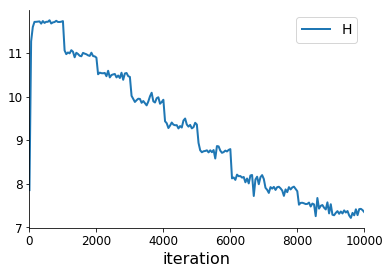

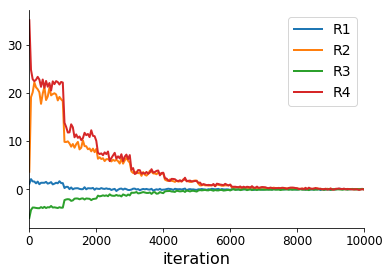

In [5]:
opt_data.plot('iteration', 'H')
R_keys = ["R%d" % (i+1) for i in range(4)]
opt_data.plot('iteration', R_keys)

Model.epi_opt_movie took  131.11082124710083  seconds.


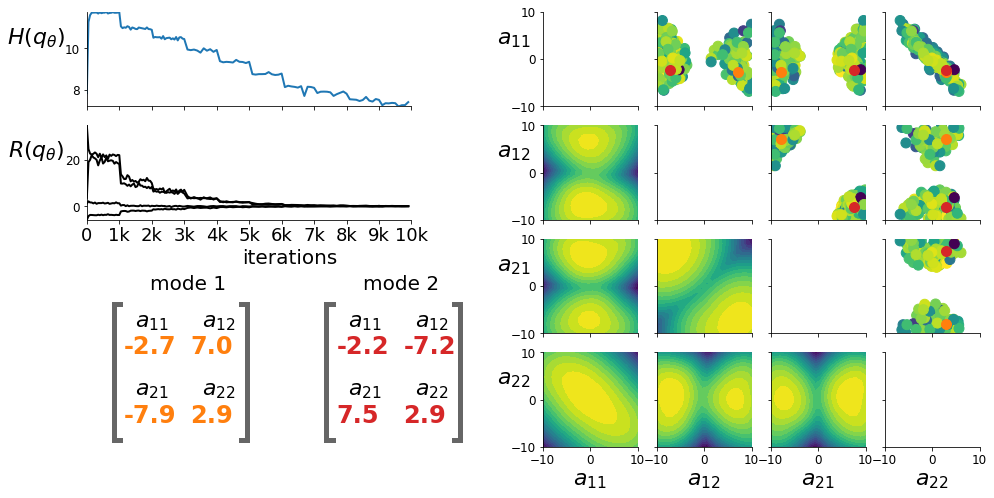

In [6]:
M.epi_opt_movie(save_path)